This notebook will be mainly used for the capstone project.

In [1]:
import pandas as pd
import numpy as np

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [3]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
import warnings
warnings.filterwarnings("ignore")

Resampling

In [4]:
!pip install pydotplus
!pip install imblearn

In [5]:
import matplotlib.pyplot as plt   
from pydotplus import graph_from_dot_data
from IPython.display import Image  
import seaborn as sns
from IPython.display import HTML, display
import tabulate

Importing relevant libraries

In [6]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.python.keras import utils
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

Data preprocessing

In [7]:
# The code was removed by Watson Studio for sharing.

In [8]:
#merging datafiles
frames = [df1, df2, df3]
result = pd.concat(frames, axis=0)

In [9]:
#dropping unnecessary columns
result= result.drop(['Grid Ref: Northing','Grid Ref: Easting','Reference Number','Expr1','Accident Date','Lighting Conditions','1st Road Class'],axis=1)

#dropping observations with missing values
result= result.dropna(axis=0)

In [10]:
#listing objects for the further processing 
list1=['Monday','Tuesday','Wednesday','Thursday']
list2=['Friday','Saturday','Sunday']
list3=['Fine without high winds','Fine with high winds']
list4=['Snowing without high winds','Snowing with high winds']
list5=['Raining without high winds','Raining with high winds']
list6=['Fog or mist']
list7=['Minibus (8 to 16 passenger seats)','Bus or coach (17 or more passenger seats)']
list8=['Goods vehicle 3.5 tonnes mgw and under','Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw','goods','Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw']
list9=['Motorcycle over 50cc and up to 125cc','Motorcycle over 125cc and up to 500cc','M cycle 50cc and under','Motorcycle over 500cc','Motorcycle Unknown CC']
list10=['Car','Taxi or Private hire car']
list11=['Driver', 'Driver ']
list12=['Pedestrian']

In [11]:
#converting 'Day' feature
def b(row):
    if row['Day']in list1:
        val='weekday'
    elif row['Day']in list2:
        val='weekend'
    return val
result['Day'] = result.apply(b, axis=1)

#converting 'Weather Conditions' feature
def e(row):
    if row['Weather Conditions']in list3:
        val='fine'
    elif row['Weather Conditions']in list4:
        val='snowing'
    elif row['Weather Conditions']in list5:
        val='raining'
    elif row['Weather Conditions']in list6:
        val='fog'
    else: 
        val='other'   
    return val
result['Weather Conditions'] = result.apply(e, axis=1)

#converting 'Type of Vehicle' feature
def j(row):
    if row['Type of Vehicle']in list7:
        val='bus'
    elif row['Type of Vehicle']in list8:
        val='goods vehicle'
    elif row['Type of Vehicle']in list9:
        val='motorcycle'
    elif row['Type of Vehicle']in list10:
        val='car'
    else: 
        val='other'
    return val
result['Type of Vehicle'] = result.apply(j, axis=1)

#converting 'Time (24hr) feature
def c(row):
    if 600< row['Time (24hr)'] <= 1801:
        val='Day-time'
    else:
        val='Night-time'
    return val
result['Time (24hr)'] = result.apply(c, axis=1)

#converting 'Casualty Class' feature
def a(row):
    if row['Casualty Class']in list11:
        val='Driver'
    elif row['Casualty Class']in list12:
        val='Pedestrian'
    else: 
        val='Passenger'
    return val
result['Casualty Class'] = result.apply(a, axis=1)

#creating dummy variables for categegorical variales 
result=pd.get_dummies(result,columns=['Day','Time (24hr)','Road Surface','Weather Conditions','Casualty Class','Sex of Casualty','Type of Vehicle'])

#dealing with columns containing the same information
result = result.drop(['Day_weekday', 'Time (24hr)_Day-time', 'Sex of Casualty_Female'] , axis=1)

Resampling

In [12]:
result['Casualty Severity'].value_counts()

Slight     6739
Serious     957
Fatal        48
Name: Casualty Severity, dtype: int64

In [13]:
seed=12345
np.random.seed(seed)

In [14]:
#dividing dataset into two: X- independent variables and y- dependent variable  
X = result.drop('Casualty Severity', axis=1)
y = result['Casualty Severity']

In [15]:
#undersampling 'Slight' class to the 'Serious' class
array = ['Slight', 'Serious']
result_a=result.loc[result['Casualty Severity'].isin(array)]
X_a = result_a.drop('Casualty Severity', axis=1)
y_a = result_a['Casualty Severity']
sm = RandomUnderSampler()
X_a, y_a = sm.fit_sample(X_a, y_a)
label = list(X)
X_a=pd.DataFrame(data = X_a, columns = label)
y_a=pd.DataFrame(data = y_a, columns = ['Casualty Severity'])
result_b=pd.merge(y_a,X_a,right_index=True, left_index=True)
result_c=result.loc[result['Casualty Severity']=='Fatal']
cols=list(result_b)
result_c=result_c[cols]
result_d=pd.concat([result_b,result_c])
result_d['Casualty Severity'].value_counts()

Serious    957
Slight     957
Fatal       48
Name: Casualty Severity, dtype: int64

In [16]:
#oversampling 'Fatal' class to the 'Serious' class
array = ['Fatal', 'Serious']
result_e=result_d.loc[result_d['Casualty Severity'].isin(array)]
X_e = result_e.drop('Casualty Severity', axis=1)
y_e = result_e['Casualty Severity']
sm = SMOTE()
X_e, y_e = sm.fit_sample(X_e, y_e)
X_d = result_d.drop('Casualty Severity', axis=1)
label = list(X_d)
X_e=pd.DataFrame(data = X_e, columns = label)
y_e=pd.DataFrame(data = y_e, columns = ['Casualty Severity'])
result_f=pd.merge(y_e,X_e,right_index=True, left_index=True)
result_g=result_d.loc[result_d['Casualty Severity']=='Slight']
cols=list(result_f)
result_g=result_g[cols]
result_h=pd.concat([result_f,result_g])
result_h['Casualty Severity'].value_counts()

Slight     957
Serious    957
Fatal      957
Name: Casualty Severity, dtype: int64

In [17]:
#dividing dataset into two: X- independent variables and y- dependent variable  
X = result_h.drop('Casualty Severity', axis=1)
y = result_h['Casualty Severity']
result=result_h

Standardization and PCA Analysis

In [18]:
#standardization 
stdsc = StandardScaler()
X_1 = stdsc.fit_transform(X)

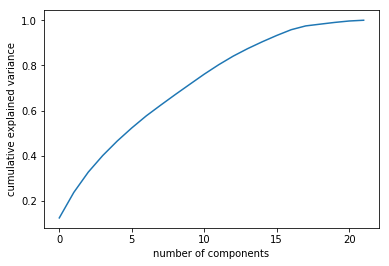

In [19]:
#choosing the number of components for PCA
pca = PCA().fit(X_1.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
#the first 12 components contain approximately 90% of the variance

In [20]:
#PCA
pca = PCA(n_components=12)
X_2 = pca.fit_transform(X_1)

Decision tree

45.733280100658156
51.89907568718544
61.58318815331011
65.23978900503292
69.03600464576074
70.28951316298877
71.8569734804491
71.64767228029423
72.23976480836237
71.99610433604336
72.51899438637244
72.06627468060395
71.8569734804491
71.57871176926055
71.09090689121177
70.32447735191637
69.9066008517228
69.76759097948121
69.73226384049556
69.76698606271776
69.59289101819589
69.20949477351917
69.20937379016647
69.34874661246612
69.10508614014711
69.2789392179636
69.17440960123885
69.24421699574138
69.13968737901664
69.10484417344173
69.10472319008903
69.10472319008903
69.10472319008903
69.10472319008903
69.10472319008903
69.10472319008903
69.10472319008903
69.10472319008903
69.10472319008903


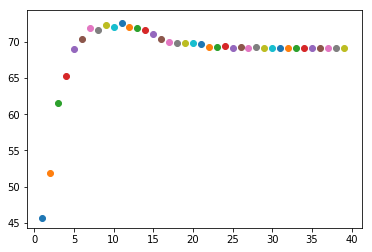

In [21]:
#searching for the depth of the tree that returns the best model accuracy
for i in range(1,40):
    tree = DecisionTreeClassifier(criterion='gini',max_depth=i ,random_state=1)  
    tree .fit(X, y) 
    y_pred =tree .predict(X)
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    score = cross_val_score(tree, X, y, cv=kfold)
    mean=score.mean()*100
    plt.scatter(i, mean)
    print(mean)
plt.show()

In [22]:
#defining the model with max_depth=6
tree = DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=1)  
tree.fit(X, y) 
y_pred=tree.predict(X)

#evaluation procedure
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

#cross validation
score = cross_val_score(tree, X, y, cv=kfold)
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (score.mean()*100, score.std()*100))
#The results are summarized as both the mean and standard deviation of the model accuracy on the dataset.

mean accuracy 70.29% (standard deviation 3.41%)


In [23]:
#finding the 3 most important features
importance = tree.feature_importances_
column_names = X.columns.values.tolist()
importances = dict(zip(importance, column_names))

important_features = []

for ii in range(len(importance)):
    if ii < 3:
        important_features.append(importances[sorted(importance, reverse = True)[ii]])
        
print('The 3 most important features in decision tree model are: '+str(important_features))

The 3 most important features in decision tree model are: ['Road Surface_Wet or Damp', 'Road Surface_Dry', 'Age of Casualty']


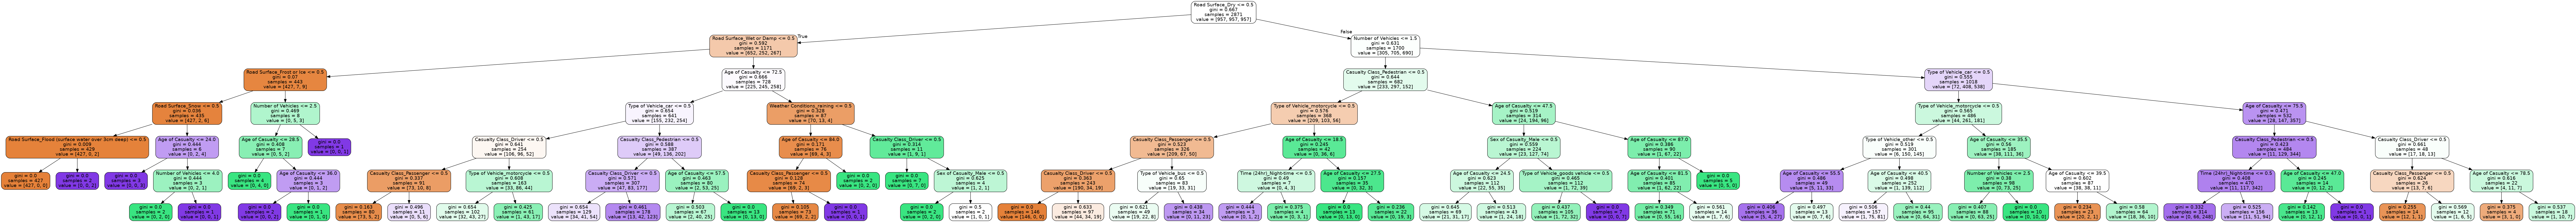

In [24]:
#plotting decision tree
dot_data = export_graphviz(tree,
                            filled=True, 
                            rounded=True,
                            out_file=None,
                            feature_names=list(X))  

graph=graph_from_dot_data(dot_data)

graph.write_png('tree.png')

from IPython.display import Image
Image('tree.png', width=1000)

Random Forest

In [25]:
#converting column values
y_forest=np.where(y=='Slight',0,np.where(y=='Serious',1,2))
y_forest=pd.DataFrame(data = y_forest, columns = ['Casualty Severity'])

In [26]:
#defining the model
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X, y_forest)
y_pred=tree.predict(X)

#evaluation procedure
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

#cross validation
score1 = cross_val_score(forest, X, y_forest, cv=kfold)
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (score1.mean()*100, score1.std()*100))
#The results are summarized as both the mean and standard deviation of the model accuracy on the dataset.

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y w

mean accuracy 64.83% (standard deviation 4.83%)


Neural Network

In [27]:
#one hot encoding
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = utils.np_utils.to_categorical(encoded_y)

In [28]:
# defining baseline model
def baseline_model():
    model = Sequential()
    model.add(Dense(24, input_dim=12, activation='relu'))
    model.add(Dense(12, input_dim=24, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#“relu” activation function reduces likelihood of vanishing gradient
#using a “softmax” activation function ensuring that the output values are in the range of 0 and 1 and may be used as predicted probabilities
#when using the "categorical_crossentropy" loss, your targets should be in categorical format (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except for a 1 at the index corresponding to the class of the sample) 
#"Adam" optimizer realizes the benefits of both AdaGrad (Adaptive Gradient Algorithm) and RMSProp (Root Mean Square Propagation)

In [29]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
#batch defines the number of samples to work through before updating the internal model parameters
#epoch defines the number of times that the learning algorithm will work through the entire training dataset
#verbose is a general programming term for produce lots of logging output; set to 0 (silent) not to slower the computation

KNN

68.58195412311268
68.58207510646534
71.47394018583043
72.13511420828495
72.83282520325203
73.00631533101046
72.27497096399536
72.97123015873015
72.55274874177313
72.79665118079753
72.86657955865273
72.65739934185056
72.90190669763842
72.97123015873017
72.93650793650794
73.07563879210221
72.37877468060395
72.30933023615951
71.99549941927991
71.78680313588849
71.47345625241968
71.22955381339528
71.22967479674797
71.0555797522261
71.05582171893148
71.36928958575301
71.09090689121177
70.95117111885403
70.91669086333721
70.84664150212929
70.60261807975223
70.70726867982967
70.5328106852497
70.56789585753
70.28878726287263
70.2192218350755
70.39307491289199
70.32350948509485
70.18425764614788


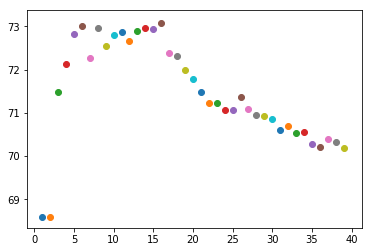

In [31]:
#searching for the number of the neighbors that returns the best model accuracy
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i, p=2,
                               metric='minkowski')
    knn.fit(X_2, y)
    results3 = cross_val_score(knn, X_2, y, cv=kfold)
    mean=results3.mean()*100
    plt.scatter(i, mean)
    print(mean)
plt.show()

In [32]:
#defining the model with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5, p=2,
                               metric='minkowski')
knn.fit(X_2, y)

#cross validation
results3 = cross_val_score(knn, X_2, y, cv=kfold)

print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results3.mean()*100, results3.std()*100))
#The results are summarized as both the mean and standard deviation of the model accuracy on the dataset.

mean accuracy 72.83% (standard deviation 2.67%)


Logistic Regression using PCA

In [33]:
#defining the model
lr = LogisticRegression(C=100, random_state=1)
#the term C is directly related to the regularization parameter λ
lr.fit(X_2, y)

#cross validation
results1 = cross_val_score(lr, X_2, y, cv=kfold)
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results1.mean()*100, results1.std()*100))
#The results are summarized as both the mean and standard deviation of the model accuracy on the dataset.

mean accuracy 57.58% (standard deviation 2.82%)


Logistic Regression without PCA

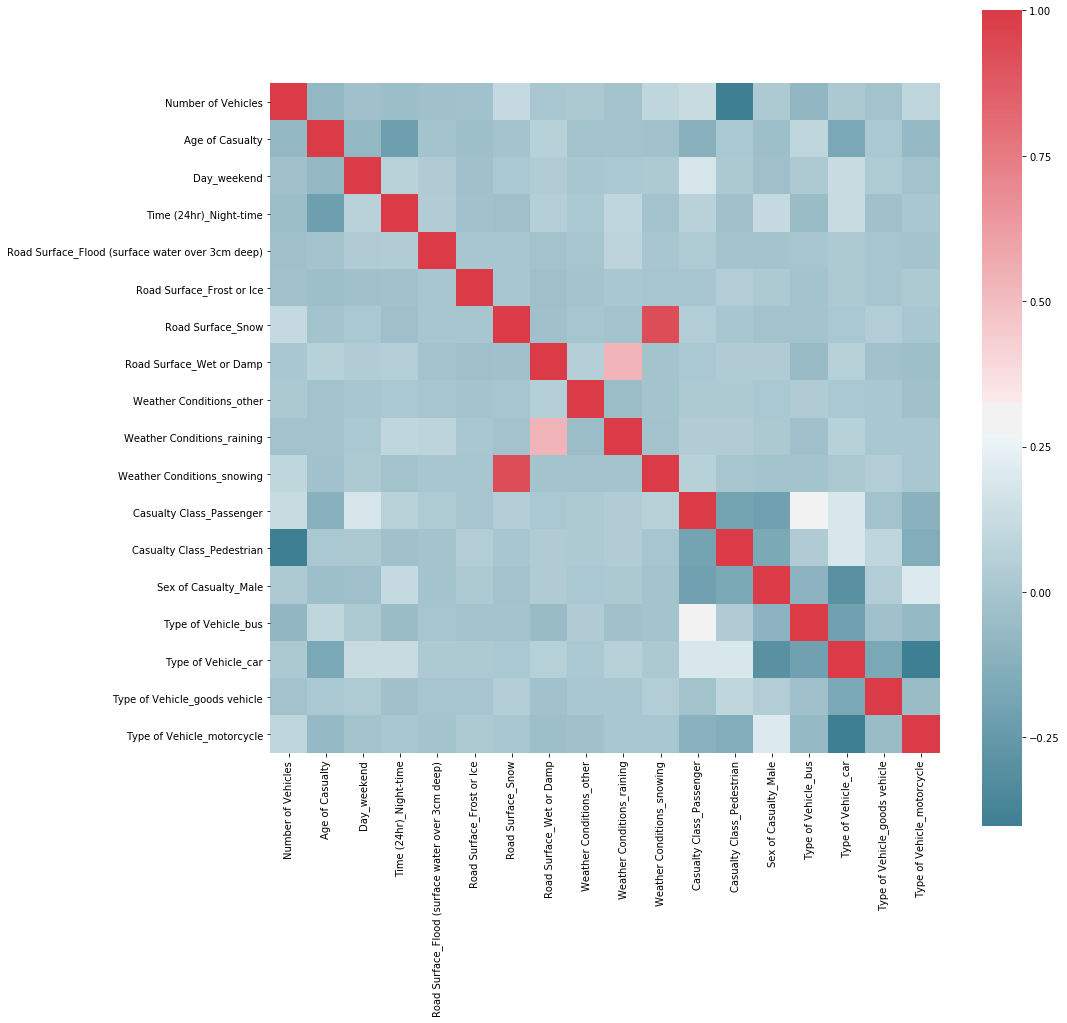

In [34]:
#dropping reference variables
X_3 = X.drop(['Road Surface_Dry', 'Weather Conditions_fine', 'Casualty Class_Driver', 'Type of Vehicle_other'], axis=1)
#correlation matrix
f, ax = plt.subplots(figsize=(15, 15))
corr = X_3.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

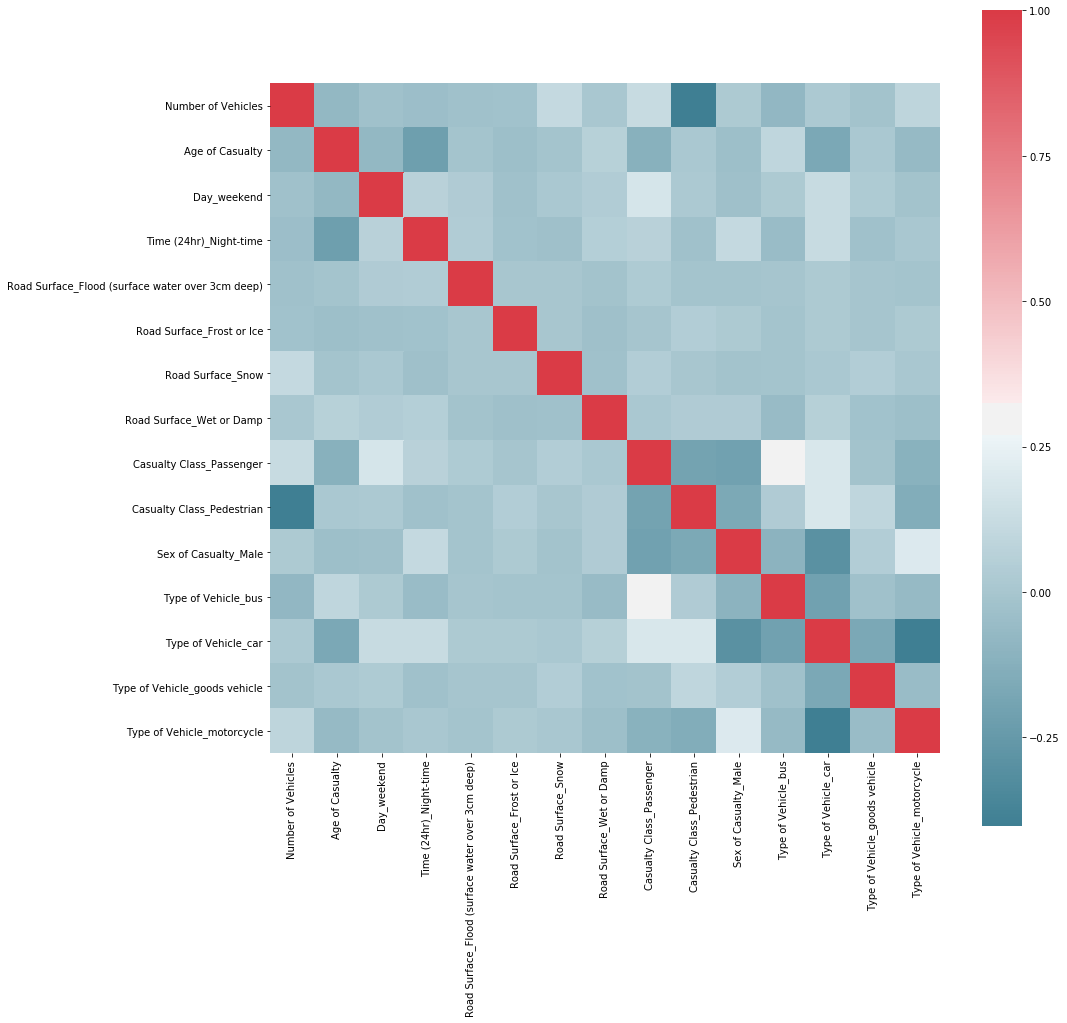

In [35]:
#dropping highly correlated variables
X_4 = X_3.drop(['Weather Conditions_other',
 'Weather Conditions_raining',
 'Weather Conditions_snowing'], axis=1)
#correlation matrix
f, ax = plt.subplots(figsize=(15, 15))
corr = X_4.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [36]:
#defining the model
lr = LogisticRegression(C=100, random_state=1)
#the term C is directly related to the regularization parameter λ
lr.fit(X_4, y)

#cross validation
results2 = cross_val_score(lr, X_4, y, cv=kfold)
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results2.mean()*100, results2.std()*100))
#The results are summarized as both the mean and standard deviation of the model accuracy on the dataset.

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

mean accuracy 61.20% (standard deviation 2.98%)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
#displaying coefficients
coef = lr.coef_[0]
table = [coef]
display(HTML(tabulate.tabulate(table, headers=list(X_4), tablefmt='html')))

Number of Vehicles,Age of Casualty,Day_weekend,Time (24hr)_Night-time,Road Surface_Flood (surface water over 3cm deep),Road Surface_Frost or Ice,Road Surface_Snow,Road Surface_Wet or Damp,Casualty Class_Passenger,Casualty Class_Pedestrian,Sex of Casualty_Male,Type of Vehicle_bus,Type of Vehicle_car,Type of Vehicle_goods vehicle,Type of Vehicle_motorcycle
-1.30191,0.00932819,-0.495094,0.0412317,-0.0472011,-0.137232,-0.0490335,-0.0579612,-1.01846,-1.44977,-0.0421609,-1.15769,-0.342452,-0.876593,-0.835106


Summary

In [39]:
table = [["Decision Tree",round(score.mean()*100,2),round(score.std()*100,2)],
         ["Random Forest",round(score1.mean()*100,2),round(score1.std()*100,2)],
         ["KNN",round(results3.mean()*100,2) , round(results3.std()*100,2)],
         ["Logistic Regression with PCA", round(results1.mean()*100,2) , round(results1.std()*100,2)],
         ["Logistic Regression without PCA", round(results2.mean()*100,2) , round(results2.std()*100,2)]]
display(HTML(tabulate.tabulate(table, headers=["Algorithm","Mean Accuracy", "Standard Deviation"], tablefmt='html')))

Algorithm,Mean Accuracy,Standard Deviation
Decision Tree,70.29,3.41
Random Forest,64.83,4.83
KNN,72.83,2.67
Logistic Regression with PCA,57.58,2.82
Logistic Regression without PCA,61.2,2.98
